# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import datetime
import matplotlib.dates as mdate
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create a base url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# Counters
city_counter = 1
set_counter = 1

# Create the lists to hold relative data
cities_list= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("Started")

# Create a query url for each city in the cities list to get json response
for i, city in enumerate(cities):
    
    # Group cities as sets of 50s
    if (i % 50 == 0 and i >= 50):
        set_counter += 1
        city_counter = 1
         
    # Create API url for each city
    query_url = base_url +"&q=" + city
    
    # Get json respose for each city
    response = requests.get(query_url).json()
    #print(response)
    # Print the results 
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
    
    # Increase city counter
    city_counter += 1
    
   # Add the values to the lists
    try:       
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
    except:
        print("City not found. Skipping...")
        pass
        
print("Completed")

Started
Processing Record 1 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 1 | cherskiy
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | cayenne
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | waddan
Processing Record 10 of Set 1 | soyo
Processing Record 11 of Set 1 | fort nelson
Processing Record 12 of Set 1 | berlevag
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | dikson
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | touros
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | tubinskiy
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | cidreira


Processing Record 40 of Set 4 | reconquista
Processing Record 41 of Set 4 | diffa
Processing Record 42 of Set 4 | pisco
Processing Record 43 of Set 4 | taltal
Processing Record 44 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 45 of Set 4 | mitsamiouli
Processing Record 46 of Set 4 | puerto ayacucho
Processing Record 47 of Set 4 | stokmarknes
Processing Record 48 of Set 4 | havre-saint-pierre
Processing Record 49 of Set 4 | vila franca do campo
Processing Record 50 of Set 4 | rovaniemi
Processing Record 1 of Set 5 | bambous virieux
Processing Record 2 of Set 5 | rio cuarto
Processing Record 3 of Set 5 | khatanga
Processing Record 4 of Set 5 | samalaeulu
City not found. Skipping...
Processing Record 5 of Set 5 | udachnyy
Processing Record 6 of Set 5 | sabha
Processing Record 7 of Set 5 | nanchang
Processing Record 8 of Set 5 | longyearbyen
Processing Record 9 of Set 5 | walvis bay
Processing Record 10 of Set 5 | claresholm
Processing Record 11 of Set 5 | isangel
Processing Recor

Processing Record 26 of Set 8 | turiacu
Processing Record 27 of Set 8 | amapa
Processing Record 28 of Set 8 | safaga
Processing Record 29 of Set 8 | kletskaya
Processing Record 30 of Set 8 | trebur
Processing Record 31 of Set 8 | bembereke
Processing Record 32 of Set 8 | caratinga
Processing Record 33 of Set 8 | kargopol
Processing Record 34 of Set 8 | markova
Processing Record 35 of Set 8 | kaka
Processing Record 36 of Set 8 | iwanai
Processing Record 37 of Set 8 | japura
Processing Record 38 of Set 8 | santo tomas
Processing Record 39 of Set 8 | santa maria del oro
Processing Record 40 of Set 8 | qandala
Processing Record 41 of Set 8 | mackay
Processing Record 42 of Set 8 | iqaluit
Processing Record 43 of Set 8 | pitimbu
Processing Record 44 of Set 8 | dawei
Processing Record 45 of Set 8 | yar-sale
Processing Record 46 of Set 8 | wanaka
Processing Record 47 of Set 8 | nesna
Processing Record 48 of Set 8 | tigzirt
Processing Record 49 of Set 8 | aflu
City not found. Skipping...
Proces

Processing Record 14 of Set 12 | grand forks
Processing Record 15 of Set 12 | namibe
Processing Record 16 of Set 12 | flinders
Processing Record 17 of Set 12 | saint-max
Processing Record 18 of Set 12 | charters towers
Processing Record 19 of Set 12 | aromashevo
Processing Record 20 of Set 12 | istok
Processing Record 21 of Set 12 | saint-augustin
Processing Record 22 of Set 12 | antalaha
Processing Record 23 of Set 12 | coahuayana
Processing Record 24 of Set 12 | teya
Processing Record 25 of Set 12 | yirol
City not found. Skipping...
Processing Record 26 of Set 12 | nemuro
Processing Record 27 of Set 12 | pemangkat
Processing Record 28 of Set 12 | sterlibashevo
Processing Record 29 of Set 12 | fort frances
Processing Record 30 of Set 12 | uvinza
Processing Record 31 of Set 12 | kalomo
City not found. Skipping...
Processing Record 32 of Set 12 | ojinaga
Processing Record 33 of Set 12 | babati
Processing Record 34 of Set 12 | te anau
Processing Record 35 of Set 12 | east millcreek
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:

# Create a dictionary to keep data 
weather_data = {
     "City": cities_list,
     "Cloudiness": cloudiness,
     "Country": country,
     "Date": date,
     "Humidity": humidity,
     "Lat": lat,
     "Lng": lng,
     "Max Temp": max_temp,
     "Wind Speed": wind_speed    
 }

# Create the data frame and count variables for each columns
weather_df = pd.DataFrame(weather_data)
weather_df.count()

City          540
Cloudiness    540
Country       540
Date          540
Humidity      540
Lat           540
Lng           540
Max Temp      540
Wind Speed    540
dtype: int64

In [5]:
weather_df.head()
#write dataframe to csv file
weather_df.to_csv(output_data_file,index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

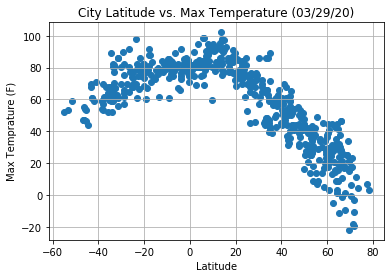

In [6]:
# Create a scatter plot for latitude and temprature
plt.scatter(weather_df["Lat"], weather_df["Max Temp"])
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (F)")
plt.grid()
plt.savefig("output_data/Images/temperature.png")
plt.show()

The code above is comparing the latitude and max temp of the cities from the weather_df. The chart shows a negative correlation between Latitude and Max Temp. As the lattiude gets further from 0, that the max temp decreases and the highest max temps are at Latitude 0.

#### Latitude vs. Humidity Plot

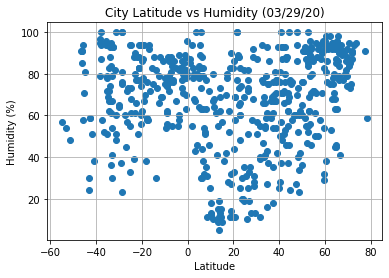

In [7]:
# Create a scatter plot for latitude and humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("output_data/Images/humidity.png")
plt.show()

The code above is comparing the latitude and humidty of the cities from the weather_df. The chart shows little to no correlation between latitude and humidity.

#### Latitude vs. Cloudiness Plot

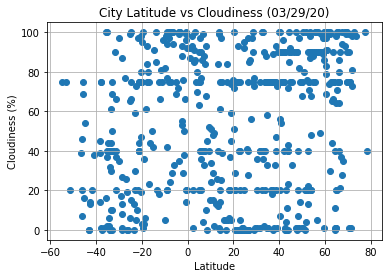

In [8]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("output_data/Images/cloudiness.png")
plt.show()

The code above is comparing the latitude and cloudinees of the cities from the weather_df. The chart shows little to no correlation between latitude and cloudiness.

#### Latitude vs. Wind Speed Plot

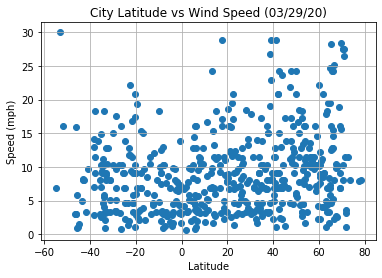

In [9]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Speed (mph)")
plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("output_data/Images/wind_speed.png")
plt.show()

The code above is comparing the latitude and windspeed of the cities from the weather_df. The chart shows little to no postive correlation between windspeed and latitude.

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots
def linearRegression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(6, 0),fontsize=15,color="red")

    print(f"rvalue    = {round(rvalue, 3)}")
    print(f"r-squared = {round(rvalue**2, 3)}")


In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem=weather_df[weather_df['Lat']>0]
southern_hem=weather_df[weather_df['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

rvalue    = -0.908
r-squared = 0.824


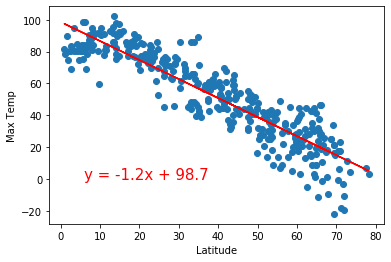

In [12]:
linearRegression(northern_hem['Lat'],northern_hem['Max Temp'],)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

A high negative r-value indicates a strong negative correlation between latituded and max temp. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

rvalue    = 0.667
r-squared = 0.445


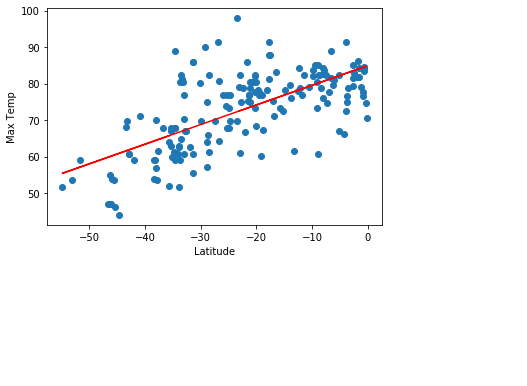

In [13]:
linearRegression(southern_hem['Lat'],southern_hem['Max Temp'],)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

A high positive r-value indicates a strong positive correlation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

rvalue    = 0.395
r-squared = 0.156


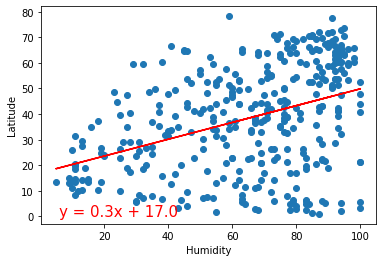

In [14]:
linearRegression(northern_hem['Humidity'],northern_hem['Lat'],)
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()

A low to medium level r-value suggests a medium level of correlation between humidity and latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

rvalue    = 0.155
r-squared = 0.024


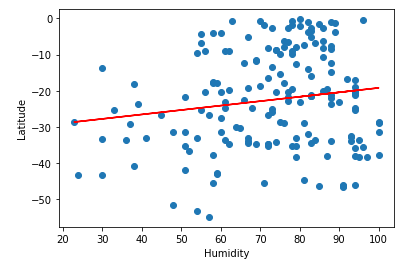

In [15]:
linearRegression(southern_hem['Humidity'],southern_hem['Lat'],)
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()

A low r-value suggests little to no positive correlation between humidity and latitude in the Southern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

rvalue    = 0.237
r-squared = 0.056


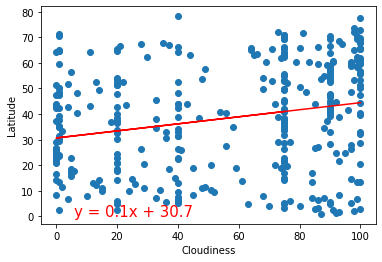

In [16]:
linearRegression(northern_hem['Cloudiness'],northern_hem['Lat'],)
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.show()

A low positive r-value indicates a weak positive correlation between cloudiness and latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

rvalue    = 0.387
r-squared = 0.15


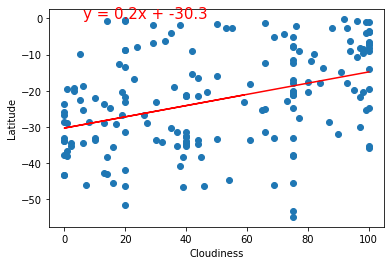

In [17]:
linearRegression(southern_hem['Cloudiness'],southern_hem['Lat'],)
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.show()

A low positive r-value indicates a weak positive correlation between cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

rvalue    = 0.216
r-squared = 0.046


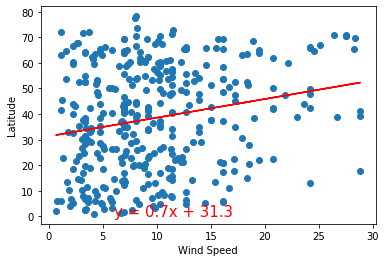

In [18]:
linearRegression(northern_hem['Wind Speed'],northern_hem['Lat'],)
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.show()

A low positive r-value indicates a weak positive correlation between wind speed and latitude for the Northen Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

rvalue    = -0.18
r-squared = 0.032


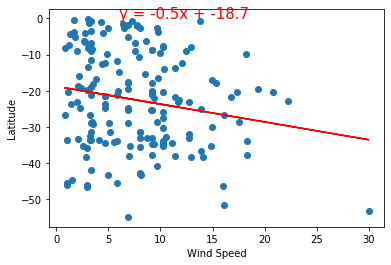

In [19]:
linearRegression(southern_hem['Wind Speed'],southern_hem['Lat'],)
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.show()

A low negative r-value indicates a weak correlation between wind speed and latitude.